In [1]:
import env
import numpy as np
import pandas as pd

In [2]:
#Set the query and url
telco_query = """
SELECT * FROM customers 
JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id
JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
JOIN payment_types ON payment_types.payment_type_id = customers.payment_type_id;
"""

telco_url = f"mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn"

In [3]:
#Read data from Codeup database
telco = pd.read_sql(telco_query, telco_url)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [4]:
#Take a quick look at the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [5]:
#Now create a function to automate this process and test it here
import acquire

telco = acquire.get_telco_data()

In [6]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [7]:
#Verify all the info is the same
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

In [8]:
#Now that we have verified the acquire function works, 
#lets create another function to chart the distributions of each variable.
import matplotlib.pyplot as plt

In [9]:
#Which variables do we want to visualize? Don't visualize variables that are just id's.
def get_vars_to_vis(telco):
    #Get column names
    cols = telco.columns
    
    #Set up empty list
    vars_to_vis = []
    
    #Use loop to check for 'id' in column name and exclude them from the list
    for col in cols:
        if 'id' not in col:
            vars_to_vis.append(col)
    
    return vars_to_vis

In [10]:
#test function
vars_to_vis = get_vars_to_vis(telco)
vars_to_vis

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [11]:
#Now create a function that calls the previous function and charts the distributions
def show_dists(telco):
    vars_to_vis = get_vars_to_vis(telco)
    
    for col in vars_to_vis:
        plt.hist(telco[col], align = 'left')
        plt.title(col)
        plt.show()


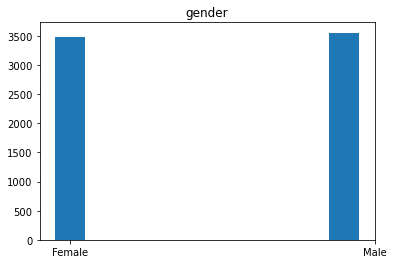

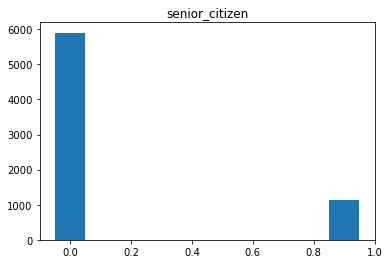

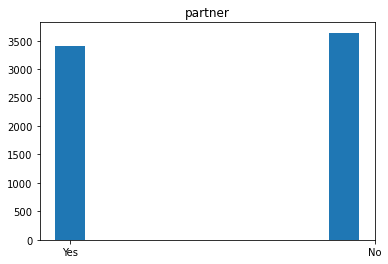

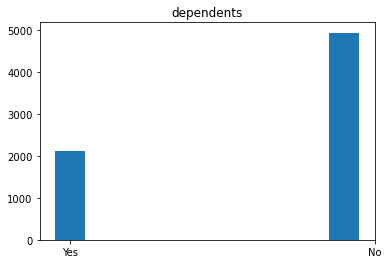

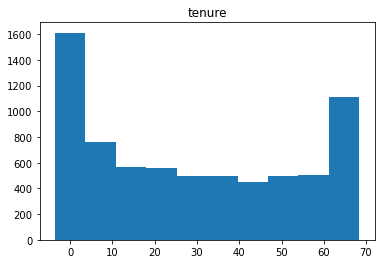

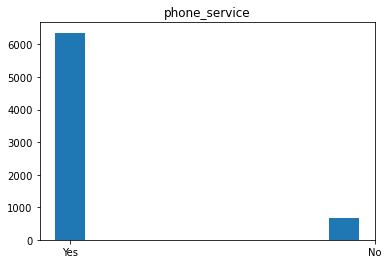

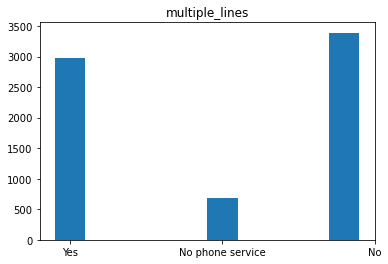

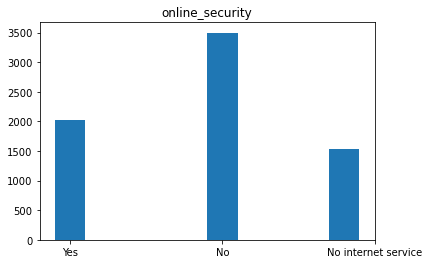

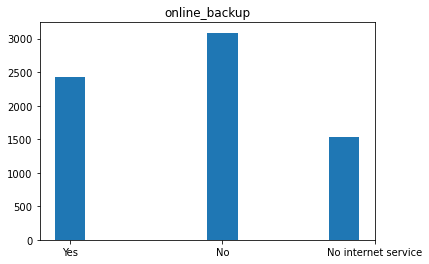

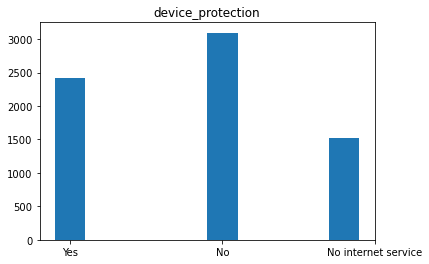

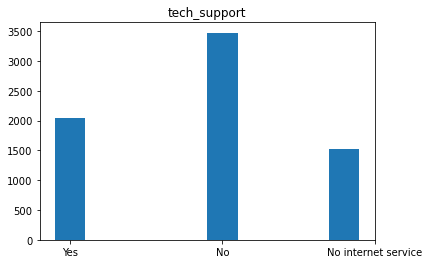

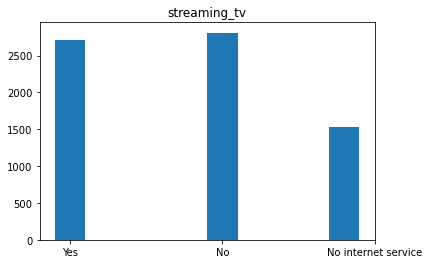

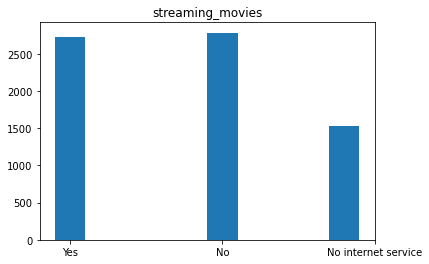

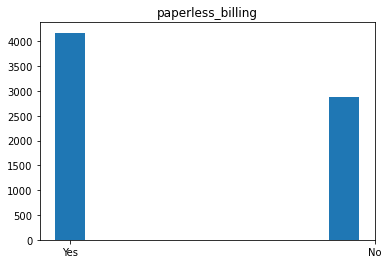

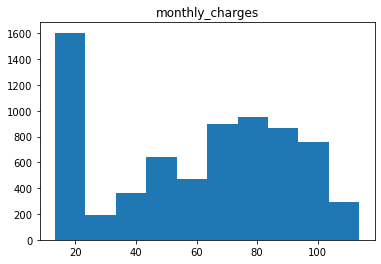

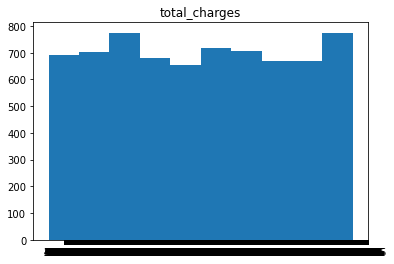

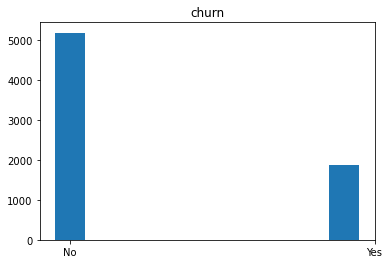

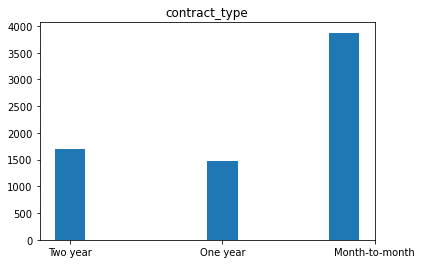

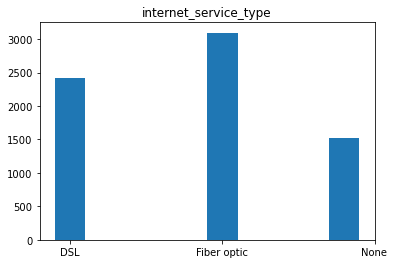

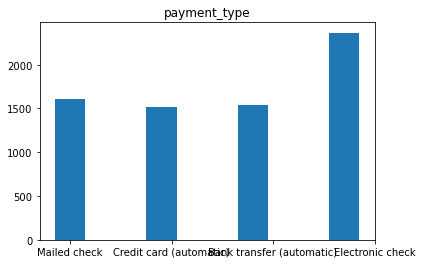

In [12]:
#Now test the show_dists function. Test successful
show_dists(telco)

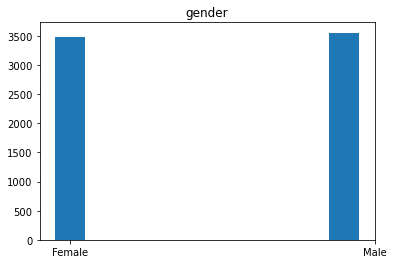

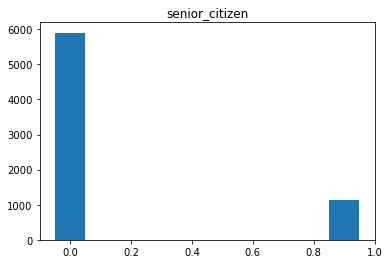

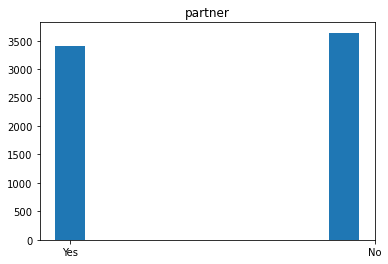

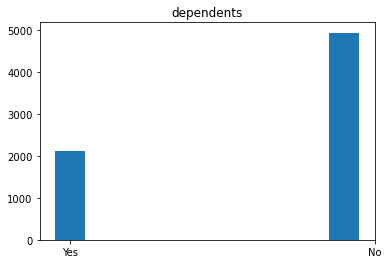

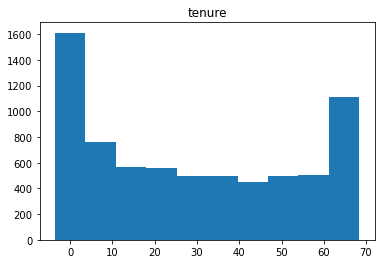

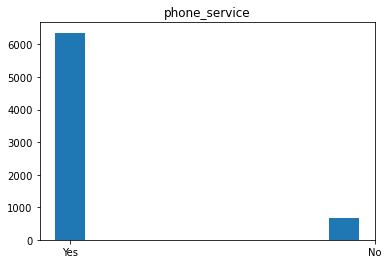

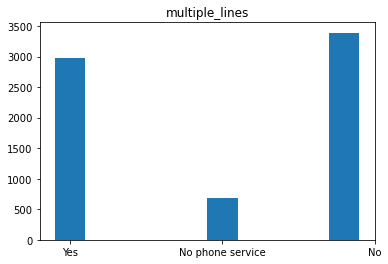

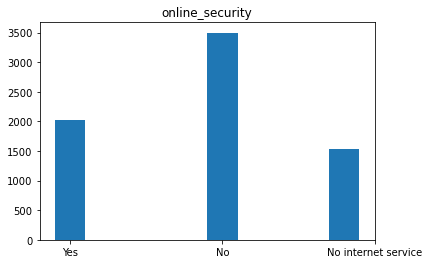

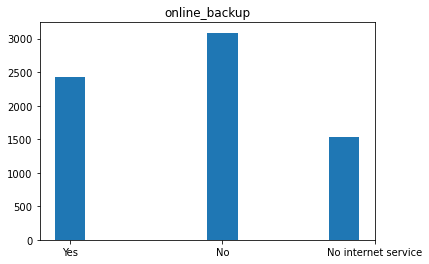

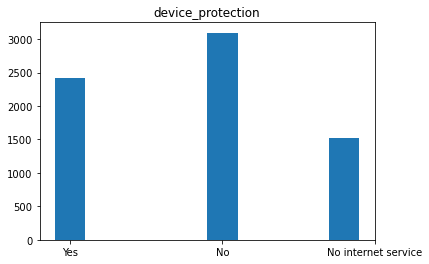

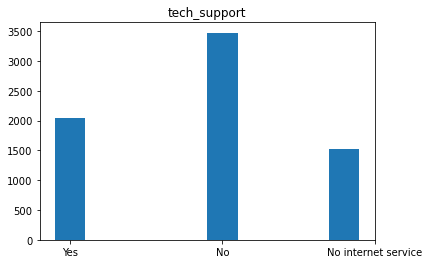

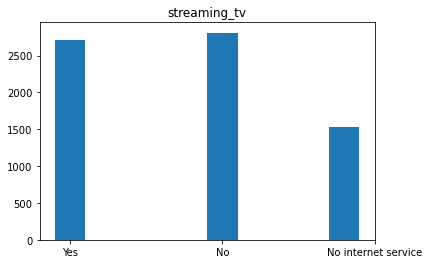

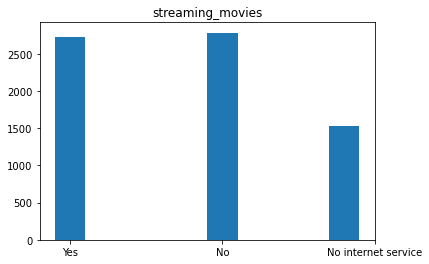

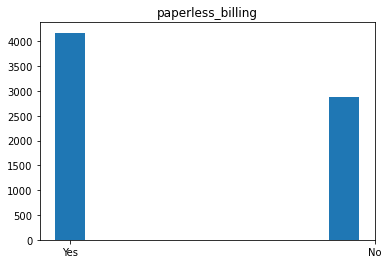

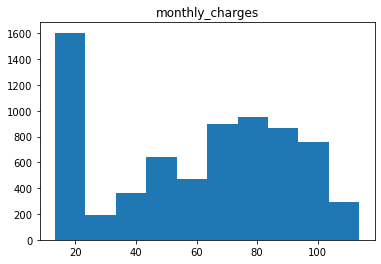

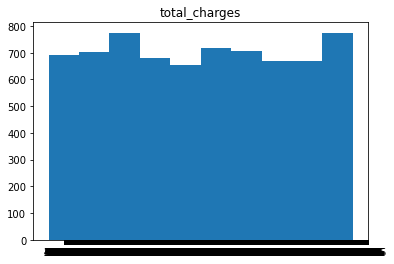

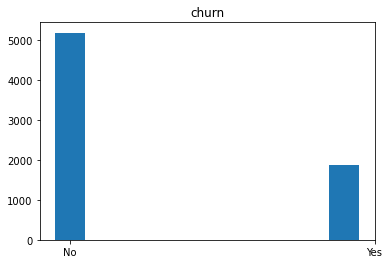

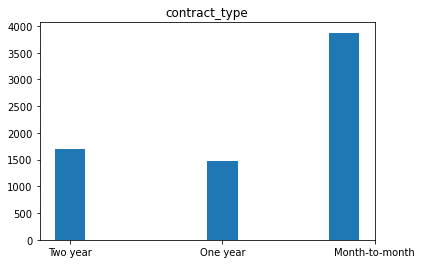

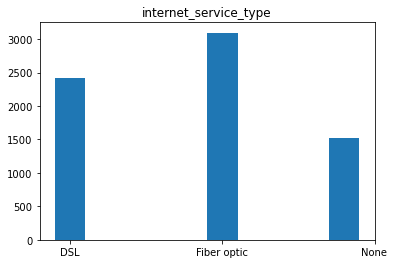

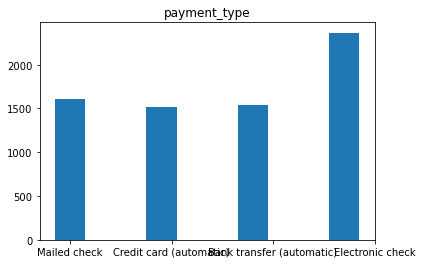

In [14]:
#Now add the created functions to the acquire module and test it here:
acquire.show_dists(telco)